In [2]:
import pandas as pd
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('../data/twitter-hate-speech2.csv', encoding='latin-1')

In [82]:
df.head(4)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,hate_class
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,0
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,0
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,0


In [6]:
df.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


# Cleaning, etc.

In [7]:
df['hate_class'] = (df['class'] == 0)*1

#TODO: more

# Train/Test Definition

In [19]:
from sklearn.model_selection import cross_val_score, StratifiedShuffleSplit
X=df['tweet']
y=df['hate_class']

sss = StratifiedShuffleSplit(n_splits=1, test_size=.15, random_state=0) #TODO: Coordinate random seed between notebooks
train_index, test_index = next(sss.split(X,y))

X_train = X.iloc[train_index]
X_test = X.iloc[test_index]
y_train = y.iloc[train_index]
y_test = y.iloc[test_index]

In [57]:
print(X_train.shape,X_test.shape)

(21065,) (3718,)


# Explore/Feature Engineer

Engineering only using the training set.

In [ ]:
# TODO

## Model Training

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV

In [75]:
pipe = Pipeline([
    ('tfidf', TfidfVectorizer(
        max_features = 2000, # wild guess
        stop_words = 'english',
        min_df=2, 
        ngram_range = (1,3)
    )),
    ('et',ExtraTreesClassifier(n_estimators=50,verbose=True))
])

param_grid = {
    'tfidf__min_df' : [2,5]
}

model = GridSearchCV(pipe, param_grid)

In [76]:
# Estimate the test set performance
p = cross_val_score(model, 
                    X_train, 
                    y_train,
                    cv=3, # stratified k fold
                    scoring='precision' #precision
)
p

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]

array([ 0.42201835,  0.46666667,  0.56164384])

In [77]:
model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.0s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.1s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=2000, min_df=2,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
 ...ators=50, n_jobs=1, oob_score=False, random_state=None,
           verbose=True, warm_start=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'tfidf__min_df': [2, 5]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

# Held Out Test

In [78]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


In [79]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.95      0.99      0.97      3503
          1       0.50      0.14      0.22       215

avg / total       0.92      0.94      0.93      3718



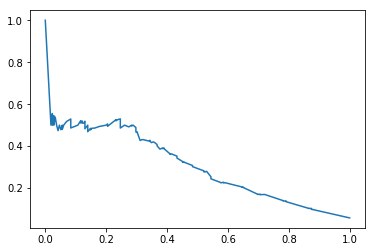

In [80]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
p,r,_ = precision_recall_curve(y_test,y_proba[:,1])
plt.plot(r,p) 

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3473,   30],
       [ 185,   30]])